# Mobile Apps That Attract User

In this project, we'll try to find which mobile app profile which more likely to attract more users. We'll be working with a data set of about 10,000 Android apps from Google Play Store. The data set can be found [here](https://www.kaggle.com/lava18/google-play-store-apps).

#### Summary

After analyzing the dataset we've found that the most popular apps that attract more users are `GAME` with less competition than `FAMILY` and `TOOLS` category. Category to go for is `PHOTOGRAPHY` is most popular after the three most popular category and will more likely to attract more users than `TOOLS` and `FAMILY` category. Another category to go for is `WEATHER` and `EDUCATION` even though they are among top 25 popular category but they have a good overall number of installs than `TOOLS` and `FAMILY` category.

## About Mobile Apps

According to [bankmycell.com](https://www.bankmycell.com/blog/how-many-phones-are-in-the-world) as of 2021 there are 6.37 billion smartphones users in the world, which represents around 80% of the global population. This presents a significant opportunity for developers to create apps that appeal to this large user base.

According to [gs.statcounter.com](https://gs.statcounter.com/os-market-share/mobile/worldwide), Android has the largest market share with 70.93%, while iOS has a market share of 28.37%. This indicates that the majority of smartphone users are on the Android platform.


## Play Store Data

In [1]:
# import libraries
import os

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

# Visualization style
sns.set_style('darkgrid')

# Path
BASE_DIR = os.path.dirname(os.getcwd())

In [2]:
playstore = pd.read_csv(os.path.join(BASE_DIR, 'data', 'googleplaystore2018.csv'))
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
# Change column names
playstore.columns = (playstore.columns.str.replace(' ', '_') # Replace spaces with underscores
                                        .str.lower()) # Lowercase all column names
playstore.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object')

## Data Cleaning

After we've take a look at the data, we've found that there are some data that need to be cleaned, which are:
- There are some apps that have missing data
- Some have duplicate data
- Some data need to be converted to the correct data type
- there are some apps that are irrelevant to our analysis

### Dealing with Incorrect Data

The Play Store dataset has a dedicated [discussion section](https://www.kaggle.com/lava18/google-play-store-apps/discussion), and we can see that [one of the discussions](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) outlines an error for a certain row. Let's check out the row in question.

In [5]:
playstore.iloc[10472]

app               Life Made WI-Fi Touchscreen Photo Frame
category                                              1.9
rating                                               19.0
reviews                                              3.0M
size                                               1,000+
installs                                             Free
type                                                    0
price                                            Everyone
content_rating                                        NaN
genres                                  February 11, 2018
last_updated                                       1.0.19
current_ver                                    4.0 and up
android_ver                                           NaN
Name: 10472, dtype: object

We can see that the rating is 19, which is impossible. But if we look at the row closely, we can see that the rating is missing, and the category is `1.9`. This is likely a data entry error. There is two ways to deal with this:
- Delete the row
- Fix the data

Since there's only one row we can easily fix the data, so we'll do that.

In [6]:
playstore.iloc[10472, 2:] = playstore.iloc[10472, 1:-1] # Shift all values to the right by 1 column

# Fill in the missing values
playstore.loc[10472, "category"] = "LIFESTYLE"
playstore.loc[10472, "genres"] = "Lifestyle"

playstore.reviews = playstore.reviews.astype(int)

playstore.iloc[10472] # Print the data to check if the changes are correct

app               Life Made WI-Fi Touchscreen Photo Frame
category                                        LIFESTYLE
rating                                                1.9
reviews                                                19
size                                                 3.0M
installs                                           1,000+
type                                                 Free
price                                                   0
content_rating                                   Everyone
genres                                          Lifestyle
last_updated                            February 11, 2018
current_ver                                        1.0.19
android_ver                                    4.0 and up
Name: 10472, dtype: object

If we look at the information of the dataset, we can see that there is some missing value on `type` column. Let's check the row that has missing value on `type` column.

In [7]:
playstore[playstore.type.isna()]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


Since the price is `0`, we can assume that the app is free, so we'll change the `type` to `Free`.

In [8]:
playstore.loc[playstore.type.isna(), "type"] = "Free" # Fill in the missing values with "Free"

### Duplicated Data

Next, we'll check for duplicated data. We'll look for duplicated data by using the entire data and based on the app name. This will ensure that we don't miss any duplicated data.

In [9]:
# Check for duplicates
print(playstore.duplicated().sum(), playstore.app.duplicated().sum(), sep='\n')

483
1181


As we can see, there's a difference in the number of duplicated data, by the entirity if the data and by the `App` column. This means that there are `483` data that are duplicated, but there are `1181` data that has the same app name. First, we'll delete the `483` duplicated data and then take a look at the `1181` data that has the same `app` name.

In [10]:
playstore.drop_duplicates(inplace=True) # Drop duplicates

In [11]:
playstore[playstore.app.duplicated()].sort_values('app').head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up


We see that the only difference between the duplicated data is the number of reviews. The higher the number of reviews, the more recent the data should be. So we'll keep the data with the highest number of reviews and delete the other data.

In [12]:
playstore = (playstore.sort_values("reviews", ascending=False) # Make sure the most reviewed app is first
                        .drop_duplicates("app", keep="first")) # Drop all duplicates except the first

### Convert Data Type

In [13]:
# Convert installs to int
playstore.installs = (playstore.installs.str.replace("+", "") 
                                        .str.replace(",", "")
                                        .astype(int))

# convert ratings to float
playstore.rating = playstore.rating.astype(float).fillna(0.0) # Fill in the missing values with 0.0

# convert price to float
playstore.price = playstore.price.str.replace("$", "").astype(float)

### Removing Unnecessary Data

There are 2 unnecessary data in the dataset:
- Column `Last Updated` and `Current Ver` are not relevant to our analysis (can be used to filter out irrelevant apps or apps that are not updated for a long time)
- Specific Country Apps, like Arabic, Chinese, etc.

In [14]:
playstore = playstore.loc[:, "app":"last_updated"] # Drop columns that are not needed

In [15]:
def is_english(text):
    """Check if a string contains only English characters"""
    non_ascii = 0
    for character in text:
        if ord(character) > 127:
            non_ascii += 1

    # Threshold for 3 non-ASCII characters
    if non_ascii > 3: 
        return False
    else:
        return True

In [16]:
playstore["is_english"] = playstore.app.apply(is_english)

playstore_en = playstore[playstore.is_english == True].copy()
playstore_non_en = playstore[playstore.is_english == False].copy() # For later use

## Finding the Most Attractive App Profile

### Checking for Outliers

Before we start analyzing the data, we'll check for outliers. we don't want to include outliers in our analysis, because it will skew our result.

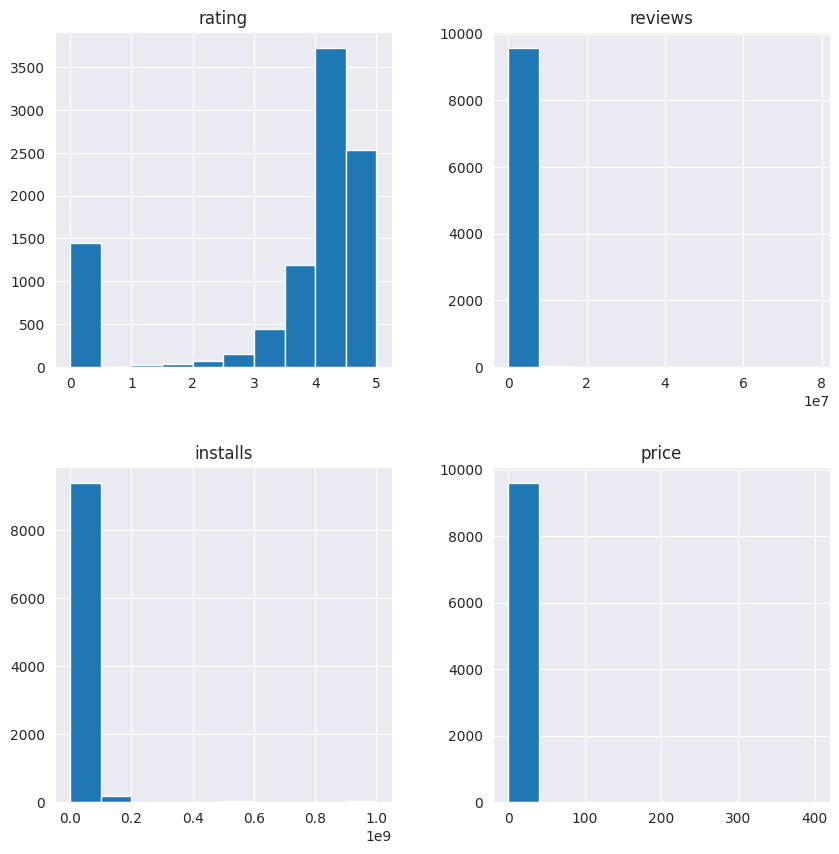

In [17]:
# Visualize distribution of all columns
playstore_en.hist(figsize=(10, 10))
plt.show()

The result are expected. But, the problem is with the `installs` column. We can see that the `installs` column is skewed to the right, which means that there are some apps that have a lot of installs while most of installs are in the lower range. This is expected, since there are so many apps that have a lot of installs, while most of the apps have a small number of installs. But we don't want to include the apps that have a lot of installs in our analysis, since it will skew our result. So we'll remove the apps that have more than `100 million` installs.

In [18]:
playstore_en_outliers = playstore_en[playstore_en.installs >= 100000000] # Get outliers
playstore_en = playstore_en[playstore_en.installs < 100000000] # Remove outliers
playstore_en_outliers.sample(20)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,is_english
1992,Hill Climb Racing 2,GAME,4.6,2750645,Varies with device,100000000,Free,0.0,Everyone,Racing,"August 2, 2018",True
1892,Cooking Fever,GAME,4.5,3198176,82M,100000000,Free,0.0,Everyone,Arcade,"July 12, 2018",True
420,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17714850,40M,500000000,Free,0.0,Teen,Communication,"August 2, 2018",True
3348,Applock,TOOLS,4.4,4934130,Varies with device,100000000,Free,0.0,Everyone,Tools,"June 11, 2018",True
2621,LinkedIn,SOCIAL,4.2,1225367,Varies with device,100000000,Free,0.0,Everyone,Social,"August 2, 2018",True
5077,AppLock,TOOLS,4.4,4931562,Varies with device,100000000,Free,0.0,Everyone,Tools,"June 11, 2018",True
1984,Angry Birds Rio,GAME,4.4,2610680,46M,100000000,Free,0.0,Everyone,Arcade,"July 3, 2018",True
4696,"VideoShow-Video Editor, Video Maker, Beauty Ca...",VIDEO_PLAYERS,4.6,4016834,Varies with device,100000000,Free,0.0,Everyone,Video Players & Editors,"July 23, 2018",True
5417,Mobile Legends: Bang Bang,GAME,4.4,8219586,99M,100000000,Free,0.0,Teen,Action,"July 24, 2018",True
4032,Dubsmash,VIDEO_PLAYERS,4.2,1971777,29M,100000000,Free,0.0,Teen,Video Players & Editors,"May 11, 2018",True


We can see that most of the outliers are an apps that is:
- Installed by default on the phone, like `Google`, `Google Chrome`, `Google Search`, etc,
- Apps that are used by a lot of people, like `Facebook`, `Instagram`, `WhatsApp`, etc.
- Stable/Big apps, like `LINE`, `Netflix`, `LinkedIn`, etc.

### Free vs Paid Apps

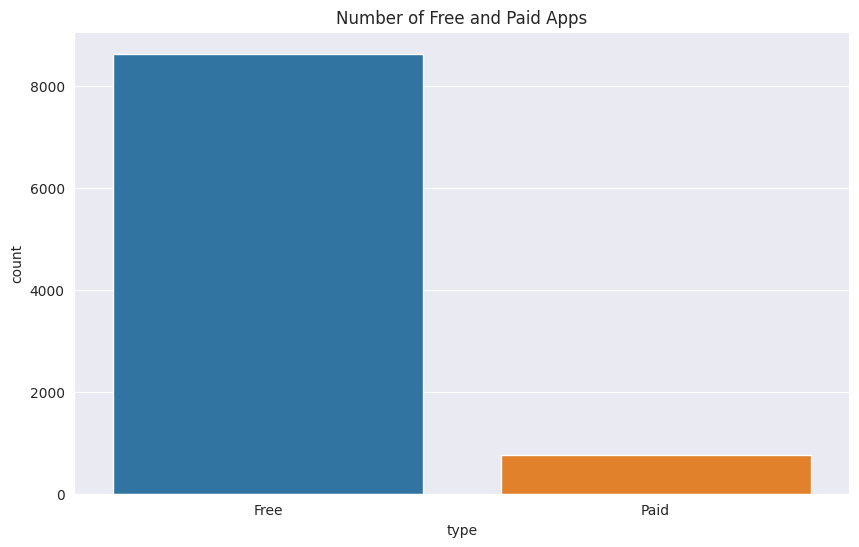

In [19]:
# Visualize the number of free and paid apps
plt.figure(figsize=(10, 6))
sns.countplot(x="type", data=playstore_en)
plt.title("Number of Free and Paid Apps")
plt.show()

Free apps seems to dominate the market, but that doesn't mean that paid apps are not popular. We'll take a look at the number of free and paid apps in the dataset.

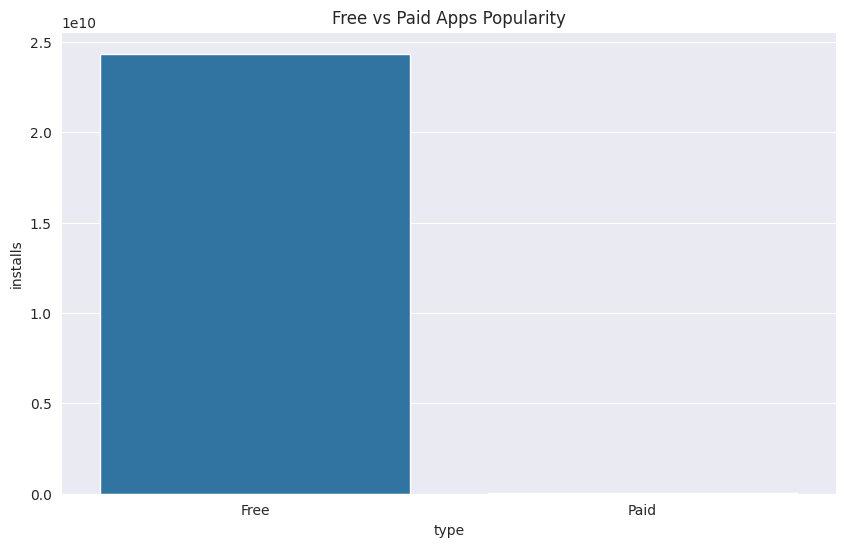

In [20]:
# Visualize the number of free and paid apps
plt.figure(figsize=(10, 6))
sns.barplot(x="type", y="installs", data=playstore_en, estimator=np.sum, errorbar=None)
plt.title("Free vs Paid Apps Popularity")
plt.show()

Well don't question it (lol). Well as we all well aware, free apps doesn't always mean free. There are some apps that have in-app purchases, which means that the app is free, but you have to pay for some features. But currently we don't have any data to analyze the in-app purchases, so we'll just assume that the apps that are free are really free.

## Most Popular Apps by Category

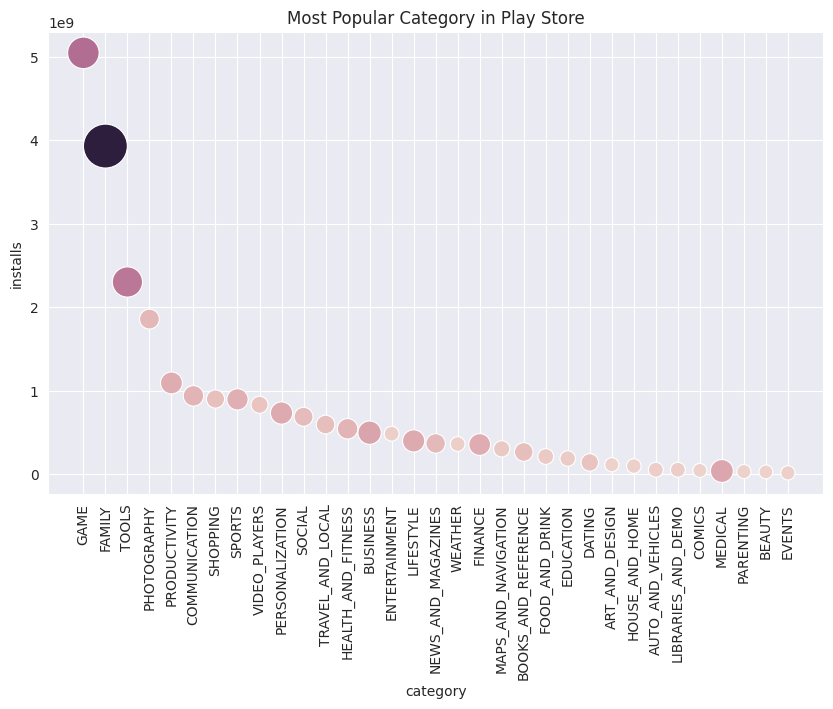

In [21]:
playstore_en_summary = playstore_en.groupby("category").agg({"app": "count", "installs": "sum"}).sort_values("installs", ascending=False)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=playstore_en_summary.index, y="installs", data=playstore_en_summary, size="app", sizes=(100, 1000), hue="app", legend=False)
plt.title("Most Popular Category in Play Store")
plt.xticks(rotation=90)
plt.show()

We can see that the most popular category are:
1. Game
2. Family
3. Tools
4. Photography
5. So on.

But this doesn't mean that the most popular category will attract more users. we'll need to take a look on the performance of the number of installs in each category.

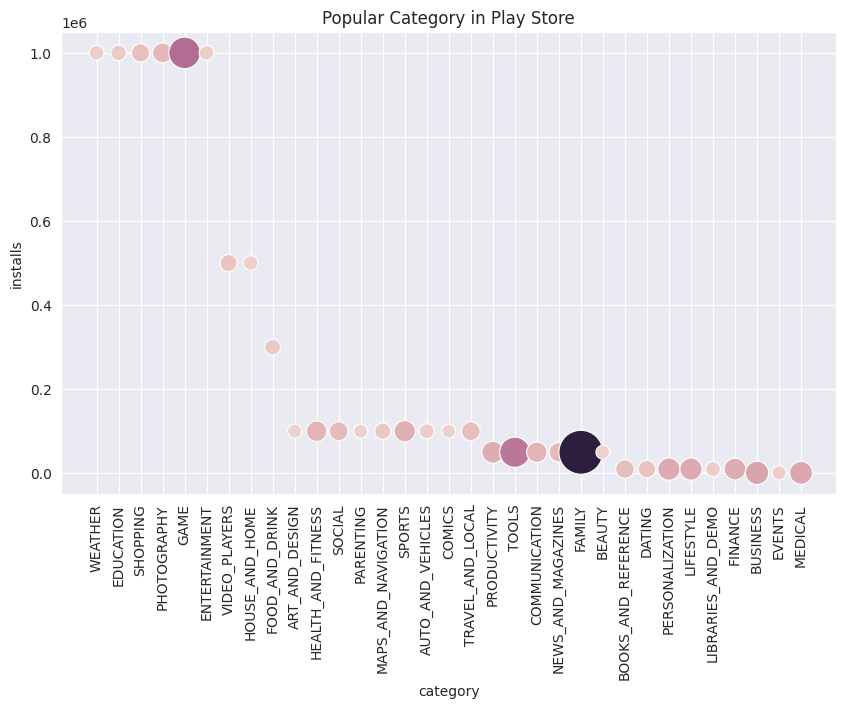

In [22]:
playstore_en_summary = playstore_en.groupby("category").agg({"app": "count", "installs": "median"}).sort_values("installs", ascending=False)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=playstore_en_summary.index, y="installs", data=playstore_en_summary, size="app", sizes=(100, 1000), hue="app", legend=False)
plt.title("Popular Category in Play Store")
plt.xticks(rotation=90)
plt.show()

Now we see some reversal. The most popular category are:
1. Weather
2. Education
3. Shopping
4. Photography
5. Game
6. Entertainment

Not only that, we see that the competition outside game category is not so fierce. And I would like to exclude `Shopping` and `Enterainment` category. It seems that both of these categories are dominated by big companies. So we'll exclude these two categories.

In [23]:
playstore_en[playstore_en.category == "SHOPPING"].sort_values("installs", ascending=False).head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,is_english
2684,Mercado Libre: Find your favorite brands,SHOPPING,4.7,3860225,Varies with device,50000000,Free,0.0,Everyone,Shopping,"August 3, 2018",True
9842,"Groupon - Shop Deals, Discounts & Coupons",SHOPPING,4.6,1371082,Varies with device,50000000,Free,0.0,Teen,Shopping,"August 3, 2018",True
2693,Myntra Online Shopping App,SHOPPING,4.3,1315242,Varies with device,50000000,Free,0.0,Everyone,Shopping,"July 21, 2018",True
2674,The birth,SHOPPING,4.7,1084945,Varies with device,50000000,Free,0.0,Teen,Shopping,"August 3, 2018",True
2663,"letgo: Buy & Sell Used Stuff, Cars & Real Estate",SHOPPING,4.5,973270,20M,50000000,Free,0.0,Teen,Shopping,"August 6, 2018",True


In [24]:
playstore_en[playstore_en.category == "ENTERTAINMENT"].sort_values("installs", ascending=False).head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,is_english
889,Twitch: Livestream Multiplayer Games & Esports,ENTERTAINMENT,4.6,2133296,Varies with device,50000000,Free,0.0,Teen,Entertainment,"July 31, 2018",True
879,Talking Ginger 2,ENTERTAINMENT,4.2,702975,49M,50000000,Free,0.0,Everyone,Entertainment,"July 5, 2018",True
892,PlayStation App,ENTERTAINMENT,4.2,613059,25M,50000000,Free,0.0,Everyone,Entertainment,"July 26, 2018",True
886,Amazon Prime Video,ENTERTAINMENT,4.2,411683,24M,50000000,Free,0.0,Teen,Entertainment,"August 2, 2018",True
873,MEGOGO - Cinema and TV,ENTERTAINMENT,4.0,175528,Varies with device,10000000,Free,0.0,Everyone,Entertainment,"August 3, 2018",True


### Most Popular Apps by Genre

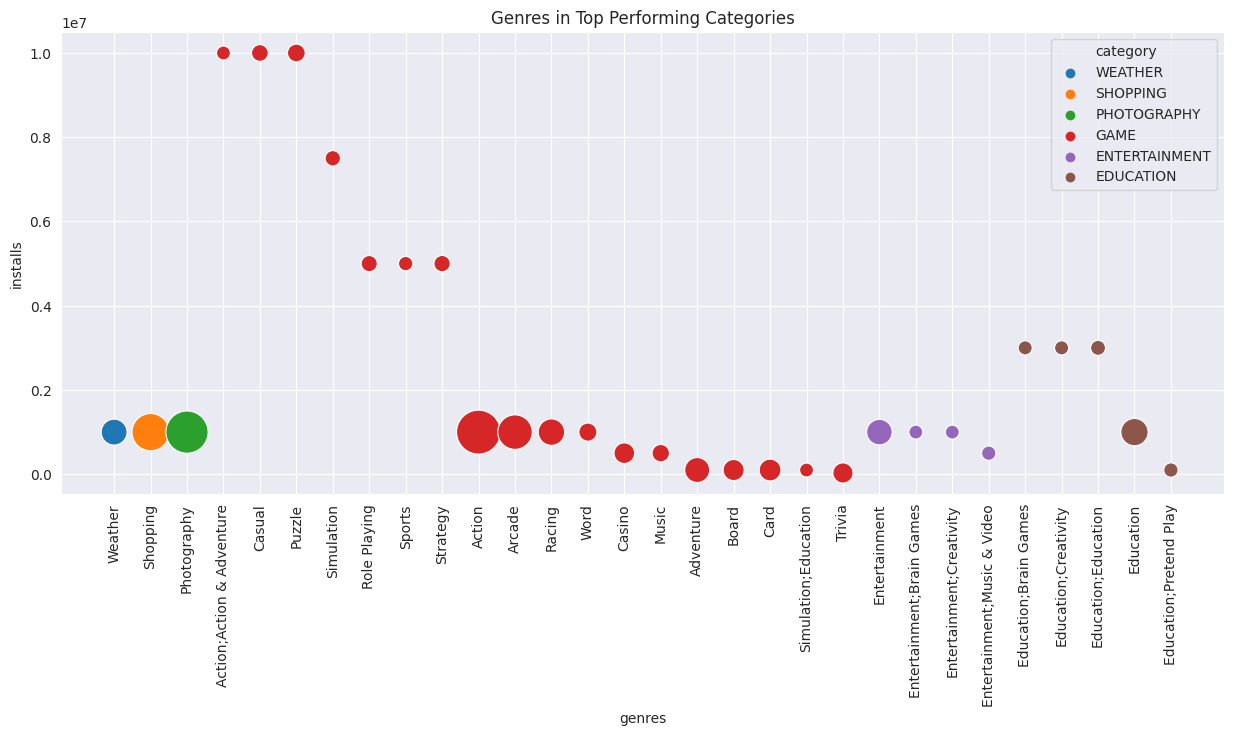

In [25]:
# Top performing categories
top_performing_categories = playstore_en_summary.index[:6]
playstore_en_top = playstore_en[playstore_en.category.isin(top_performing_categories)]
playstore_en_top_summary = playstore_en_top.groupby(["category", "genres"]).agg({"app": "count", "installs": "median"}).reset_index().sort_values(["category", "installs"], ascending=False)
playstore_en_top_summary

# Visualize genres in top performing categories
plt.figure(figsize=(15, 6))
sns.scatterplot(x="genres", y="installs", data=playstore_en_top_summary, size="app", sizes=(100, 1000), hue="category")
plt.title("Genres in Top Performing Categories")
plt.xticks(rotation=90)
# remove size legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:7], labels[0:7], loc="upper right")
plt.show()

It seems like only `GAME` category that matter when we're talking about genre here. The other categories doesn't really have a lot of genres.

### Take a Closer Look at the Popular Apps

In [26]:
weather_apps = playstore_en_top[playstore_en_top.category == "WEATHER"].sort_values("installs", ascending=False).copy()
photo_apps = playstore_en_top[playstore_en_top.category == "PHOTOGRAPHY"].sort_values("installs", ascending=False).copy()
game_apps = playstore_en_top[playstore_en_top.category == "GAME"].sort_values("installs", ascending=False).copy()
education_apps = playstore_en_top[playstore_en_top.category == "EDUCATION"].sort_values("installs", ascending=False).copy()

Remember that we keep the outlier data? We'll use the outlier data to brainstorm about the most popular apps.

In [27]:
playstore_en_outliers.sort_values("installs", ascending=False).head(20)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,is_english
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,Social,"August 3, 2018",True
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,Varies with device,1000000000,Free,0.0,Teen,Video Players & Editors,"August 6, 2018",True
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",True
3234,Google,TOOLS,4.4,8033493,Varies with device,1000000000,Free,0.0,Everyone,Tools,"August 3, 2018",True
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",True
464,Hangouts,COMMUNICATION,4.0,3419513,Varies with device,1000000000,Free,0.0,Everyone,Communication,"July 21, 2018",True
2884,Google Photos,PHOTOGRAPHY,4.5,10859051,Varies with device,1000000000,Free,0.0,Everyone,Photography,"August 6, 2018",True
3232,Google Street View,TRAVEL_AND_LOCAL,4.2,2129707,Varies with device,1000000000,Free,0.0,Everyone,Travel & Local,"August 6, 2018",True
5856,Google Play Games,FAMILY,4.3,7168735,Varies with device,1000000000,Free,0.0,Teen,Entertainment,"July 16, 2018",True
411,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",True


#### Game Apps

If we look at the previous result, we can see that the most promising genre in `GAME` category is `Puzzle` and `Casual`. So we'll take a look at the most popular apps in these two genres.

In [28]:
# Popular Puzzle Games
game_apps[game_apps.genres == "Puzzle"].head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,is_english
1985,Candy Crush Jelly Saga,GAME,4.3,1300619,78M,50000000,Free,0.0,Everyone,Puzzle,"July 20, 2018",True
1753,Love Balls,GAME,4.2,360630,40M,50000000,Free,0.0,Everyone,Puzzle,"July 31, 2018",True
1677,Bubble Witch 3 Saga,GAME,4.7,1732263,78M,50000000,Free,0.0,Everyone,Puzzle,"July 17, 2018",True
1877,Toy Blast,GAME,4.7,1889582,Varies with device,50000000,Free,0.0,Everyone,Puzzle,"July 23, 2018",True
1691,Marble - Temple Quest,GAME,4.3,42053,24M,10000000,Free,0.0,Everyone,Puzzle,"June 21, 2018",True


In [29]:
# Popular Casual Games
game_apps[game_apps.genres == "Casual"].head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,is_english
1894,Gardenscapes,GAME,4.6,4129665,Varies with device,50000000,Free,0.0,Everyone,Casual,"July 13, 2018",True
1766,Paint Hit,GAME,4.4,37023,33M,10000000,Free,0.0,Everyone,Casual,"July 6, 2018",True
1994,Fruit Block - Puzzle Legend,GAME,4.6,125647,33M,10000000,Free,0.0,Everyone,Casual,"July 23, 2018",True
1972,Bubble Shooter,GAME,4.5,148990,46M,10000000,Free,0.0,Everyone,Casual,"July 17, 2018",True
1904,Fruits Bomb,GAME,4.4,74695,17M,10000000,Free,0.0,Everyone,Casual,"July 6, 2018",True


#### Weather Apps

In [30]:
# Popular weather apps
weather_apps.head(10)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,is_english
4725,Weather & Clock Widget for Android,WEATHER,4.4,2371543,11M,50000000,Free,0.0,Everyone,Weather,"June 4, 2018",True
3626,The Weather Channel: Rain Forecast & Storm Alerts,WEATHER,4.4,1558437,Varies with device,50000000,Free,0.0,Everyone,Weather,"August 1, 2018",True
3649,"GO Weather - Widget, Theme, Wallpaper, Efficient",WEATHER,4.5,1422858,Varies with device,50000000,Free,0.0,Everyone,Weather,"August 3, 2018",True
3628,AccuWeather: Daily Forecast & Live Weather Rep...,WEATHER,4.4,2053404,Varies with device,50000000,Free,0.0,Everyone,Weather,"August 6, 2018",True
3652,wetter.com - Weather and Radar,WEATHER,4.2,189313,38M,10000000,Free,0.0,Everyone,Weather,"August 6, 2018",True
3644,Weather,WEATHER,4.2,18773,12M,10000000,Free,0.0,Everyone,Weather,"May 24, 2018",True
3657,HTC Weather,WEATHER,3.9,22154,Varies with device,10000000,Free,0.0,Everyone,Weather,"August 10, 2017",True
3632,MyRadar NOAA Weather Radar,WEATHER,4.5,178934,Varies with device,10000000,Free,0.0,Everyone,Weather,"August 4, 2018",True
5768,Amber Weather,WEATHER,4.4,260137,13M,10000000,Free,0.0,Everyone 10+,Weather,"July 16, 2018",True
9562,Weather 14 Days,WEATHER,4.4,279917,Varies with device,10000000,Free,0.0,Everyone,Weather,"July 18, 2018",True


In [31]:
# Less Popular weather apps
weather_apps.tail(10)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,is_english
4719,W - Weather Forecast & Animated Radar Maps,WEATHER,4.2,29,3.5M,5000,Free,0.00,Everyone,Weather,"April 23, 2018",True
10583,Florida Tides & Weather,WEATHER,3.8,30,2.0M,1000,Paid,6.99,Everyone,Weather,"May 6, 2015",True
6434,Skywatch BL,WEATHER,0.0,15,10M,1000,Free,0.00,Everyone,Weather,"February 20, 2017",True
10627,WSVN • South Florida's Source for Weather,WEATHER,0.0,7,28M,1000,Free,0.00,Everyone,Weather,"June 21, 2018",True
5110,Wind & Weather Meter for Ag,WEATHER,0.0,3,14M,1000,Free,0.00,Everyone,Weather,"March 14, 2016",True
7332,Weather Data CH,WEATHER,0.0,15,Varies with device,500,Paid,2.99,Everyone,Weather,"August 9, 2016",True
4716,W Pro - Weather Forecast & Animated Weather Maps,WEATHER,3.8,11,2.9M,500,Paid,1.99,Everyone,Weather,"April 23, 2018",True
5088,Ag Weather Tools,WEATHER,0.0,0,4.6M,500,Free,0.00,Everyone,Weather,"January 9, 2018",True
10625,"St. Petersburg, FL - weather and more",WEATHER,0.0,0,3.9M,10,Free,0.00,Everyone,Weather,"April 13, 2018",True
10612,"Clearwater, FL - weather and more",WEATHER,0.0,0,3.9M,10,Free,0.00,Everyone,Weather,"April 12, 2018",True


#### Photography Apps

In [32]:
# Popular photo apps
photo_apps.head(10)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,is_english
2931,"Video Editor Music,Cut,No Crop",PHOTOGRAPHY,4.7,2163282,Varies with device,50000000,Free,0.0,Everyone,Photography,"July 10, 2018",True
4284,Keepsafe Photo Vault: Hide Private Photos & Vi...,PHOTOGRAPHY,4.6,1656808,Varies with device,50000000,Free,0.0,Everyone,Photography,"July 31, 2018",True
2836,ASUS Gallery,PHOTOGRAPHY,4.3,125259,Varies with device,50000000,Free,0.0,Everyone,Photography,"August 2, 2018",True
2829,Selfie Camera - Photo Editor & Filter & Sticker,PHOTOGRAPHY,4.2,401820,Varies with device,50000000,Free,0.0,Everyone,Photography,"April 27, 2018",True
2916,Photo Editor Selfie Camera Filter & Mirror Image,PHOTOGRAPHY,4.3,527248,Varies with device,50000000,Free,0.0,Everyone,Photography,"February 1, 2018",True
2809,Motorola Camera,PHOTOGRAPHY,3.6,219745,Varies with device,50000000,Free,0.0,Everyone,Photography,"January 25, 2016",True
2902,Square InPic - Photo Editor & Collage Maker,PHOTOGRAPHY,4.4,635846,14M,50000000,Free,0.0,Everyone,Photography,"May 23, 2018",True
2825,InstaBeauty -Makeup Selfie Cam,PHOTOGRAPHY,4.3,654419,Varies with device,50000000,Free,0.0,Everyone,Photography,"February 1, 2018",True
4353,MakeupPlus - Your Own Virtual Makeup Artist,PHOTOGRAPHY,4.4,758780,53M,50000000,Free,0.0,Everyone,Photography,"August 3, 2018",True
2941,InstaSize Photo Filters & Collage Editor,PHOTOGRAPHY,4.3,811714,50M,50000000,Free,0.0,Everyone,Photography,"August 2, 2018",True


In [33]:
# Less Popular photo apps
photo_apps.tail(10)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,is_english
8157,Wallpaper.cz,PHOTOGRAPHY,4.9,7,2.2M,100,Free,0.00,Everyone,Photography,"July 11, 2015",True
8951,DV KING 4K,PHOTOGRAPHY,2.3,3,8.5M,100,Free,0.00,Everyone,Photography,"July 17, 2018",True
8941,Touch DV,PHOTOGRAPHY,0.0,1,11M,50,Free,0.00,Everyone,Photography,"July 7, 2017",True
9083,Displaying You VR,PHOTOGRAPHY,0.0,1,67M,50,Free,0.00,Everyone,Photography,"October 19, 2016",True
8845,PhotoFrame for Synology DS,PHOTOGRAPHY,4.0,1,2.6M,10,Paid,4.99,Everyone,Photography,"February 2, 2017",True
9178,i am EB,PHOTOGRAPHY,5.0,1,5.4M,10,Free,0.00,Teen,Photography,"February 1, 2017",True
8236,LC-DB,PHOTOGRAPHY,3.0,1,2.5M,10,Paid,3.49,Everyone,Photography,"October 20, 2017",True
8328,Guide to Nikon Df,PHOTOGRAPHY,0.0,1,663k,10,Paid,29.99,Everyone,Photography,"February 18, 2014",True
4139,F Length Sim (no Ads),PHOTOGRAPHY,0.0,0,1.7M,10,Paid,2.00,Everyone,Photography,"April 29, 2018",True
6138,BG Editor,PHOTOGRAPHY,0.0,0,8.4M,5,Free,0.00,Everyone,Photography,"July 23, 2018",True


#### Education Apps

In [34]:
# Popular Education apps
education_apps.head(10)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,is_english
832,"Learn languages, grammar & vocabulary with Mem...",EDUCATION,4.7,1107948,Varies with device,10000000,Free,0.0,Everyone,Education,"August 2, 2018",True
823,Remind: School Communication,EDUCATION,4.5,108613,Varies with device,10000000,Free,0.0,Everyone,Education,"August 3, 2018",True
807,Learn English with Wlingua,EDUCATION,4.7,314300,3.3M,10000000,Free,0.0,Everyone,Education,"May 2, 2018",True
718,Math Tricks,EDUCATION,4.5,342918,8.1M,10000000,Free,0.0,Everyone,Education,"July 29, 2018",True
824,Google Classroom,EDUCATION,4.2,69498,Varies with device,10000000,Free,0.0,Everyone,Education,"July 19, 2018",True
734,Lumosity: #1 Brain Games & Cognitive Training App,EDUCATION,4.2,215301,Varies with device,10000000,Free,0.0,Everyone,Education,"August 1, 2018",True
740,Quizlet: Learn Languages & Vocab with Flashcards,EDUCATION,4.6,211856,Varies with device,10000000,Free,0.0,Everyone,Education,"August 1, 2018",True
825,ClassDojo,EDUCATION,4.4,148550,59M,10000000,Free,0.0,Everyone,Education;Education,"August 3, 2018",True
711,Mermaids,EDUCATION,4.2,14286,Varies with device,5000000,Free,0.0,Everyone,Education;Creativity,"April 26, 2018",True
800,Learn 50 languages,EDUCATION,4.4,55256,14M,5000000,Free,0.0,Everyone,Education,"June 19, 2018",True


In [35]:
# Less Popular Education apps
education_apps.tail(10)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,is_english
813,Next Gen Science Standards,EDUCATION,4.3,206,18M,50000,Free,0.00,Everyone,Education,"December 20, 2016",True
770,GRE Tutor,EDUCATION,4.0,275,2.3M,50000,Free,0.00,Everyone,Education,"December 2, 2013",True
779,SAT Vocabulary,EDUCATION,4.2,642,Varies with device,50000,Free,0.00,Everyone,Education,"June 5, 2018",True
753,C++ Tutorials,EDUCATION,4.1,358,1.9M,50000,Free,0.00,Everyone,Education,"August 21, 2014",True
752,Quiz&Learn Python,EDUCATION,4.0,304,2.0M,10000,Free,0.00,Everyone,Education,"July 4, 2016",True
775,Pocket SAT Math,EDUCATION,4.0,430,526k,10000,Free,0.00,Everyone,Education,"July 11, 2014",True
769,GMAT Question Bank,EDUCATION,4.2,240,29M,10000,Free,0.00,Everyone,Education,"April 29, 2015",True
768,Pocket GMAT Math,EDUCATION,4.3,656,556k,10000,Free,0.00,Everyone,Education,"July 11, 2014",True
822,Training schedule - AllUniver,EDUCATION,4.1,702,7.6M,10000,Free,0.00,Everyone,Education,"October 16, 2017",True
851,Sago Mini Hat Maker,EDUCATION,4.9,11,63M,1000,Paid,3.99,Everyone,Education;Pretend Play,"July 24, 2017",True


## Conclusion





- While `FAMILY` and `TOOLS` are one of the most popular category, they are also one of the most competitive category. Not only that, the overall performance of the apps in these category are not so good.
- `GAME` category is the most popular category and it is also one of the most competitive category. But the performance of the apps in this category are good. So we can say that `GAME` category is the promising category.
    - `Puzzle` and `Casual` are the best performance genre in `GAME` category. So we can say that `Puzzle` and `Casual` are to pick if going to develop a game app.
    - While `Action` and `Arcade` are the most popular genre in `GAME` category, they are not the best performance genre.
- `SHOPPING` and `ENTERTAINMENT` category are no go. They are dominated by big companies.
- `WEATHER`, `PHOTOGRAPHY`, and `EDUCATION` category are the best category to develop an app. They are not so popular, but they are not so competitive either. And the performance of the apps in these category are good.
    - It is really good to brainstorm alongside with the outlier data since we can see what the most popular apps are. Like for example, we can go for `PHOTOGRAPHY` category and develop a `Photo Editor` app or a `Filter` app which usually used for sharing in popular apps like `Instagram` and `Facebook`.

## Next Steps

- Update the dataset and added more feature to it
- Analyze the data specifically for Paid Apps
- Expected income from the apps